In [40]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

file_path = 'summerOly_athletes.csv'
data = pd.read_csv(file_path)

data.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


In [ ]:
denmark_data = data[data['NOC'].str.contains('DEN', na=False)]
denmark_medals = denmark_data[denmark_data['Medal'] != 'No medal'].groupby('Year').size()

denmark_medals = denmark_medals.reset_index(name='Medal_Count')
denmark_medals['Year'] = pd.to_datetime(denmark_medals['Year'], format='%Y')
denmark_medals = denmark_medals.set_index('Year')

denmark_medals.head()

,Medal_Count
Year,
1896-01-01,6
1900-01-01,9
1906-01-01,34
1908-01-01,17
1912-01-01,87


predicted=7.808, expected=13.000
predicted=18.595, expected=7.000
predicted=5.732, expected=14.000
predicted=10.070, expected=23.000
predicted=12.371, expected=25.000
predicted=19.287, expected=29.000
predicted=18.888, expected=19.000
predicted=12.935, expected=16.000
predicted=18.757, expected=41.000
predicted=30.440, expected=33.000
predicted=29.349, expected=41.000
Test RMSE: 10.860


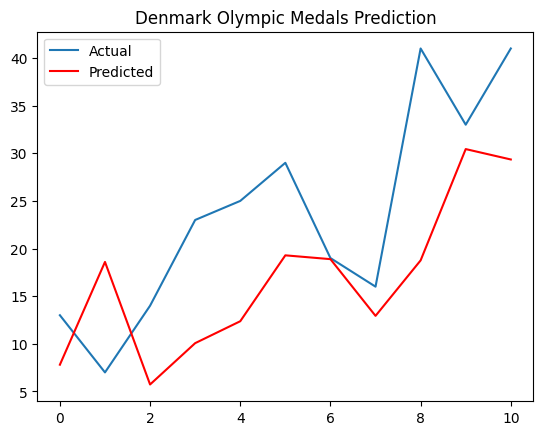

In [ ]:
#time series
series = denmark_medals['Medal_Count']
series.index = series.index.to_period('Y')

# split into train and test sets
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[:train_size], X[train_size:]
history = list(train)
predictions = []

for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))  # ARIMA(p=5, d=1, q=0)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'predicted={yhat:.3f}, expected={obs:.3f}')

# evaluate rmse
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Test RMSE: {rmse:.3f}')

# plot forecasts against actual outcomes
plt.clf()
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.title("Denmark Olympic Medals Prediction")
plt.show()

In [43]:
# fit the model on the entire series
final_model = ARIMA(series, order=(5, 1, 0))  # Use the same (p, d, q) from earlier
final_model_fit = final_model.fit()

# forecast next year's medal count
next_year_forecast = final_model_fit.forecast(steps=1)[0]

# Display the prediction for the next year
next_year = series.index[-1] + 2  # Predict for the year following the last observation
print(f"Predicted medal count for {next_year}: {next_year_forecast:.3f}")


Predicted medal count for 2026: 37.567


/tmp/ipykernel_2272/1734151418.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  next_year_forecast = final_model_fit.forecast(steps=1)[0]
